### Kaggle Veri Seti İndirme

Veri setini **C:\Users\Samira\Sumeyra\btk-akademi\ML-Fundamentals-and-Practice\Dataset** klasörüne indirmek için aşağıdaki komutu kullanabilirsin:

```bash
kaggle datasets download -d kolawale/focusing-on-mobile-app-or-website -p C:\Users\Samira\Sumeyra\btk-akademi\ML-Fundamentals-and-Practice\Dataset

Bu kod, ZIP dosyasındaki verileri hedef klasöre çıkararak, sıkıştırılmış dosyaları kullanım için hazırlar:

In [1]:
import zipfile
import os

# ZIP dosyasının yolu
zip_dosya_yolu = r"C:\Users\Samira\Sumeyra\btk-akademi\ML-Fundamentals-and-Practice\Dataset\focusing-on-mobile-app-or-website.zip"

# Çıkarma dizini
cikarma_klasoru = r"C:\Users\Samira\Sumeyra\btk-akademi\ML-Fundamentals-and-Practice\Dataset"

# ZIP dosyasını çıkarma işlemi
with zipfile.ZipFile(zip_dosya_yolu, 'r') as zip_dosya:
    zip_dosya.extractall(cikarma_klasoru)

In [4]:
import pandas as pd
import re

def format_column_names(df):
    """
    Format column names to be lowercase with underscores between words.
    Removes special characters and converts spaces to underscores.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with column names to format
    
    Returns:
    pandas.DataFrame: DataFrame with formatted column names
    
    Example:
    >>> df = pd.DataFrame({'Column Name': [1], 'Another.Column!': [2]})
    >>> format_column_names(df)
    # Returns DataFrame with columns: 'column_name', 'another_column'
    """
    def clean_column_name(col):
        # Convert to lowercase
        col = col.lower()
        
        # Replace special characters and multiple spaces with a single space
        col = re.sub(r'[^a-z0-9\s]', ' ', col)
        col = re.sub(r'\s+', ' ', col)
        
        # Strip leading/trailing spaces and replace remaining spaces with underscores
        col = col.strip().replace(' ', '_')
        
        # Remove consecutive underscores
        col = re.sub(r'_+', '_', col)
        
        return col
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_formatted = df.copy()
    
    # Apply the formatting to all column names
    df_formatted.columns = [clean_column_name(col) for col in df_formatted.columns]
    
    return df_formatted

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\ML-Fundamentals-and-Practice\Dataset\Customer-Fashion-Journey.csv")

In [6]:
data = format_column_names(data)

In [7]:
data.head()

,email,address,avatar,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   email                 500 non-null    object 
 1   address               500 non-null    object 
 2   avatar                500 non-null    object 
 3   avg_session_length    500 non-null    float64
 4   time_on_app           500 non-null    float64
 5   time_on_website       500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   yearly_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
data.describe()

,avg_session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


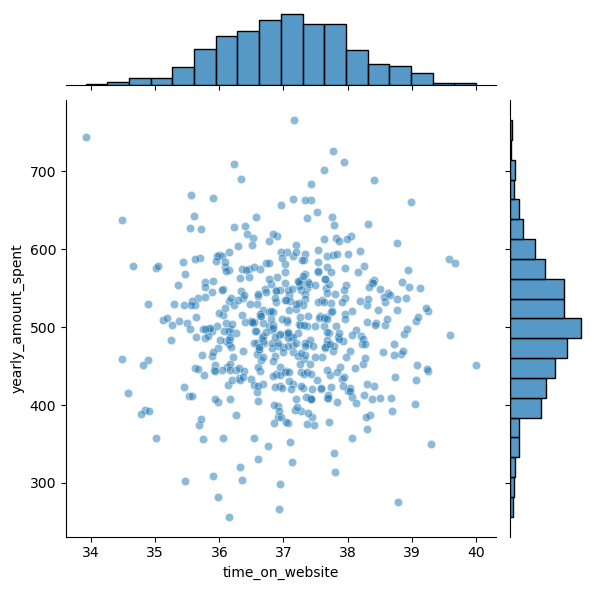

In [15]:
sns.jointplot(x = "time_on_website", y = "yearly_amount_spent", data = data, alpha = 0.5)

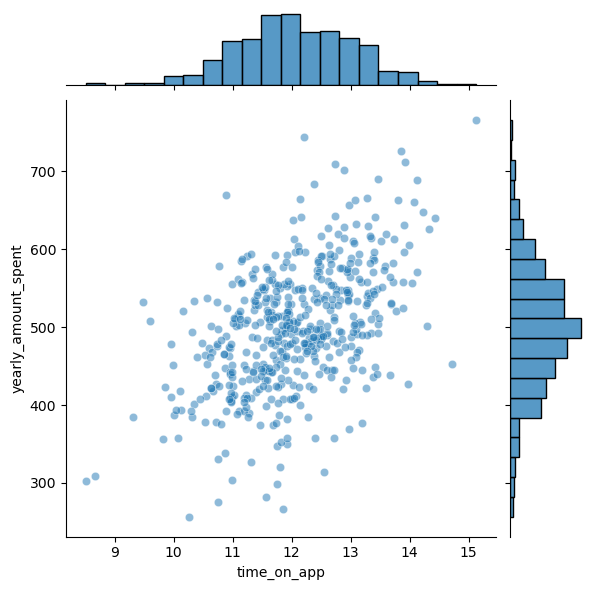

In [16]:
sns.jointplot(x = "time_on_app", y = "yearly_amount_spent", data = data, alpha = 0.5)

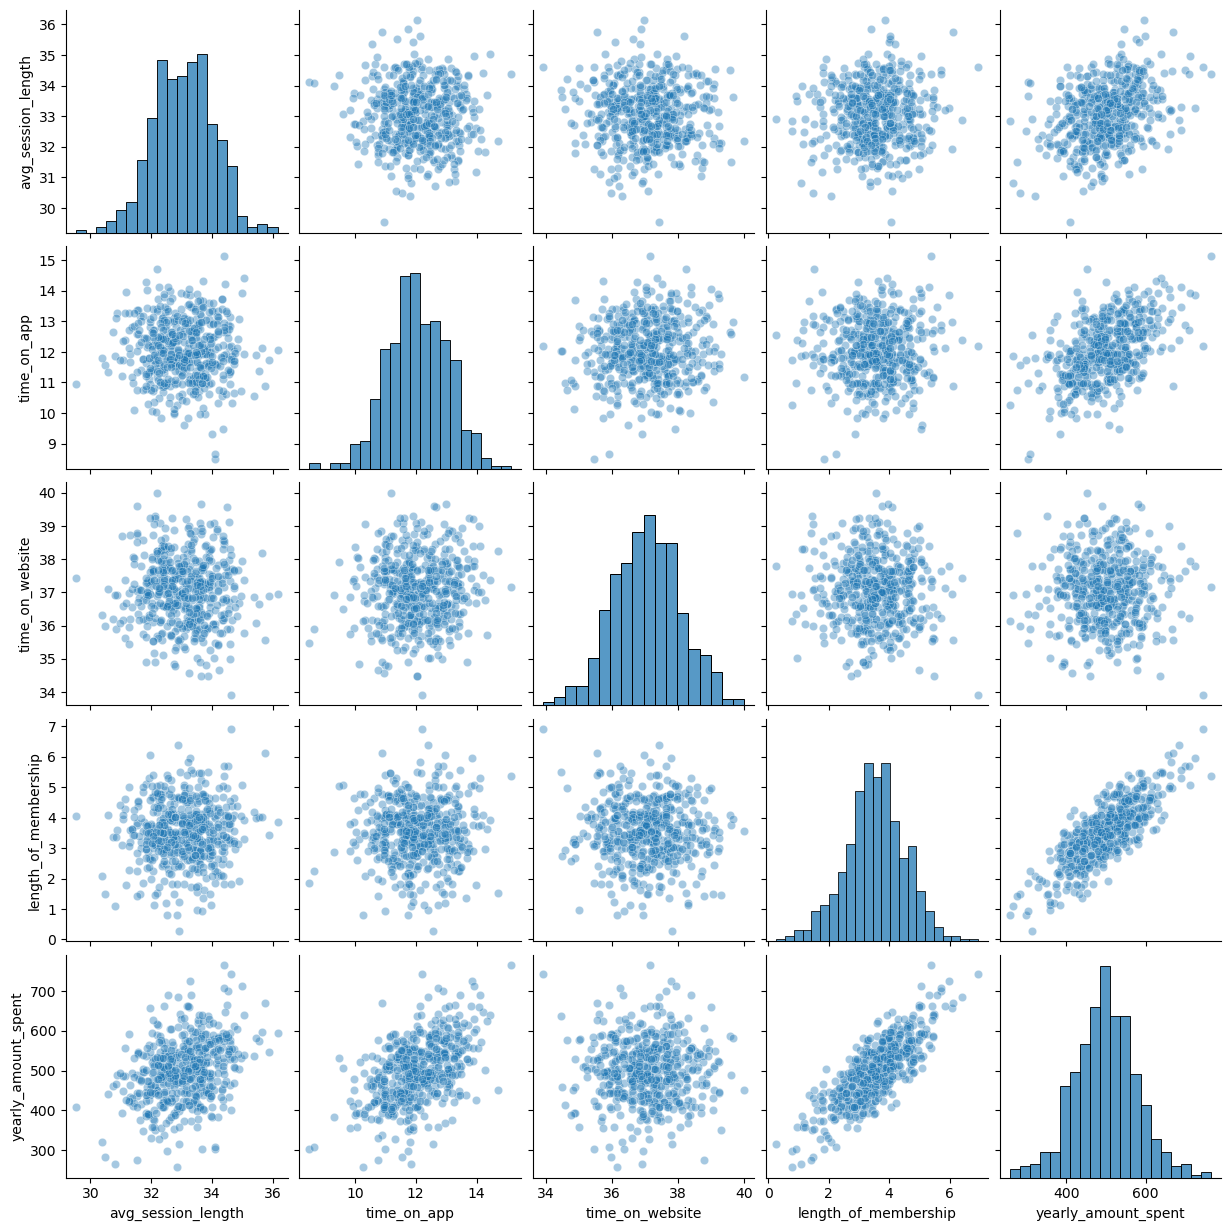

In [20]:
sns.pairplot(data, kind = "scatter", plot_kws = {"alpha": 0.4})

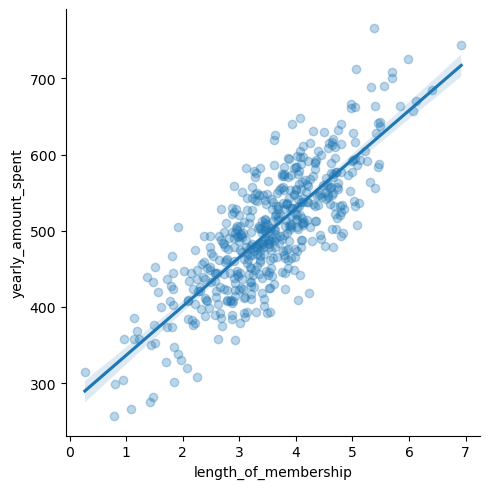

In [25]:
sns.lmplot(x = "length_of_membership",
           y = "yearly_amount_spent",
           data= data,
           scatter_kws={"alpha": 0.3})

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X = data[["avg_session_length", "time_on_app", "time_on_website", "length_of_membership"]]
y = data["yearly_amount_spent"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [35]:
X_test

,avg_session_length,time_on_app,time_on_website,length_of_membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273
23,32.903251,11.657576,36.772604,3.919302
222,34.334865,11.109456,38.585855,3.892891
261,32.550527,13.041245,36.655208,3.456234


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [45]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
print(cdf)

                           Coef
avg_session_length    25.724256
time_on_app           38.597135
time_on_website        0.459148
length_of_membership  61.674732


In [46]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Evaluation of our LM model')

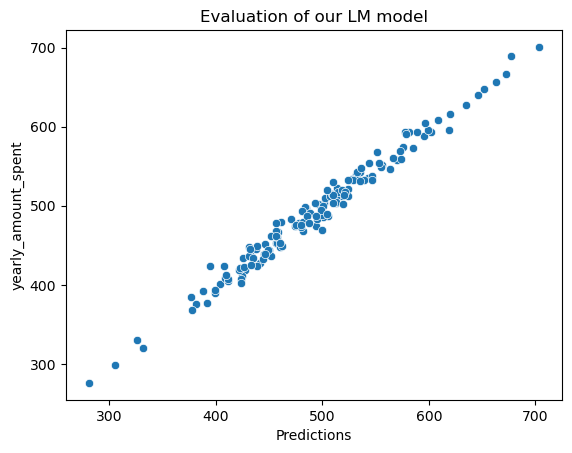

In [50]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM model")

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))

print("Mean Squared Error: ", mean_squared_error(y_test, predictions))

print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.426091641432066
Mean Squared Error:  103.9155413650329
RMSE:  10.193897260863134


Text(0.5, 1.0, 'Actual vs Predicted Values')

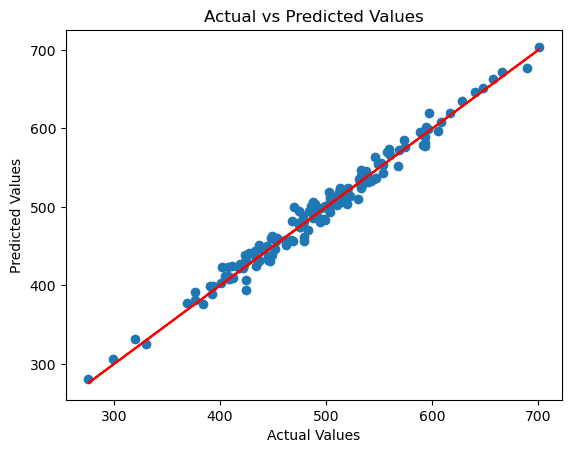

In [75]:
# Scatter plot: Compare actual values (y_test) with predictions.
plt.scatter(y_test, predictions)

# Regression line: Add a line to show the relationship between actual values and predictions.
plt.plot(y_test, y_test, color='red')  # This will show the ideal linear relationship.

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')


In [57]:
residuals = y_test -predictions

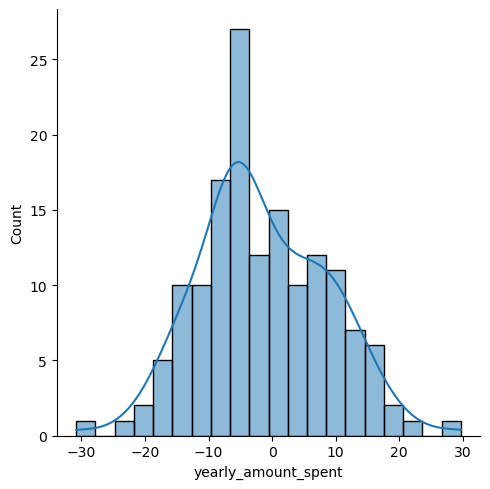

In [61]:
sns.displot(residuals, bins = 20, kde = True)

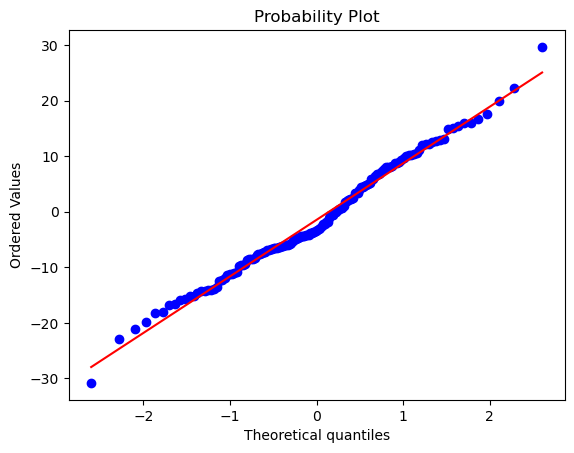

In [74]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist= "norm", plot= pylab)
pylab.show()